In [0]:
  # mounting google drive to access data
from google.colab import drive
drive.mount('/content/drive/')

In [0]:
# importing required packages
!pip install vaderSentiment
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import numpy as np
import re
from tensorflow.python.keras.preprocessing import sequence
from tensorflow.python.keras.preprocessing import text
from sklearn.preprocessing import LabelEncoder
mlb = LabelEncoder()
from sklearn.model_selection import train_test_split

     |████████████████████████████████| 133kB 2.8MB/s 


In [0]:
# importing data to pandas dataframe
tweet_df = pd.read_csv(r'/content/drive/My Drive/August01_Tweets_Final.csv')
len(tweet_df)

41292

In [0]:
# removing dulpicate tweets from data
tweet_df = tweet_df.drop_duplicates(subset='tweet')
tweet_df = tweet_df.reset_index(drop=True)
len(tweet_df)

41113

In [0]:
# Remove html
from bs4 import BeautifulSoup
def remove_html(text):
  soup=BeautifulSoup(text, 'lxml')
  html_free=soup.get_text()
  return html_free

In [0]:
# Remove Punctuation
import string
def remove_punctuation(text):
  no_punct = "".join([c for c in text if c not in string.punctuation])
  return no_punct

In [0]:
# Remove \n character
tweet_df['tweet']= tweet_df['tweet'].apply(lambda x:remove_punctuation(x)).apply(lambda x: x.replace('\n', ' ')).apply(lambda x:remove_html(x))

In [0]:
# Instantiate Tokenizer
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

In [0]:
tweet_df['tweet']= tweet_df['tweet'].apply(lambda x:tokenizer.tokenize(x.lower()))

In [0]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
# Remove Stop words
from nltk.corpus import stopwords
def remove_stopwords(text):
  words = [w for w  in text if w not in stopwords.words('english')]
  return words

In [0]:
tweet_df['tweet']=tweet_df['tweet'].apply(lambda x:remove_stopwords(x))

In [0]:
# Lemmatizer
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def word_lemmatizer(text):
  lem_text = [lemmatizer.lemmatize(i) for i in text]
  return lem_text

In [0]:
tweet_df['tweet']=tweet_df['tweet'].apply(lambda x:word_lemmatizer(x))

In [0]:
# stemming
from  nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

def word_stemmer(text):
  stem_text = " ".join([stemmer.stem(i) for i in text])
  return stem_text

In [0]:
tweet_df['tweet']=tweet_df['tweet'].apply(lambda x:word_stemmer(x))

In [0]:
# removing '&gt;'
tweet_df['tweet'] = tweet_df['tweet'].apply(lambda x: x.replace('&gt;', ''))
# Remove Hyperlinks
tweet_df['tweet']= tweet_df['tweet'].str.replace('http\S+|www.\S+', '', case=False)
# remove ' s ' that was created after removing punctuations
tweet_df['tweet'] = tweet_df['tweet'].apply(lambda x: str(x).replace(" s ", " "))

In [0]:
!pip install emoji
# Emoji removal
import emoji
#remove the emoji
def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')

     |████████████████████████████████| 51kB 3.9MB/s 
  Created wheel for emoji: filename=emoji-0.5.4-cp36-none-any.whl size=42176 sha256=9a52f1bd812809fe2611a661c87766337a8c206fc81386690439d03b12910a90
  Stored in directory: /root/.cache/pip/wheels/2a/a9/0a/4f8e8cce8074232aba240caca3fade315bb49fac68808d1a9c
Successfully built emoji


In [0]:
tweet_df['tweet'] = tweet_df['tweet'].apply(lambda x: deEmojify(x))

In [0]:
#sentiment analyzer for assigning sentiment scores
def senti(x):
  senti_obj = SentimentIntensityAnalyzer()
  score = senti_obj.polarity_scores(x)
  return score["compound"]

In [0]:
# determining sentiment using vader
tweet_df["senti_score"] = ""
senti_score = []
for i in range(0,len(tweet_df)):
  senti_score.append(senti(tweet_df["tweet"][i]))
print(senti_score)

[0.0, 0.6486, 0.0772, 0.4404, 0.0, 0.0, 0.4939, 0.0, -0.2732, 0.2023, 0.6369, 0.2037, 0.1139, 0.0, 0.0, 0.7506, 0.0, 0.2263, -0.2732, 0.0, 0.0772, 0.0, 0.7964, -0.6908, 0.7184, 0.0, 0.8176, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.34, 0.4939, 0.0, 0.6808, 0.0, 0.0, 0.0, 0.6249, 0.4939, 0.0, 0.0, 0.4019, 0.0, 0.4019, 0.0, 0.1027, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4019, 0.7184, 0.0, 0.4215, 0.0, 0.5859, 0.6705, 0.0, 0.0, -0.1531, -0.4939, 0.4404, -0.5216, 0.9231, -0.6808, 0.6249, -0.4215, 0.4019, 0.4767, 0.0, 0.0, 0.6369, 0.0, 0.0772, 0.0, 0.802, 0.0, -0.1531, 0.0, 0.4019, 0.0, -0.2732, 0.296, 0.3612, 0.0, 0.5859, 0.4404, 0.4215, 0.0, 0.1779, 0.0, 0.0, 0.0, -0.6705, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.296, 0.3612, 0.3612, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.7269, -0.5106, 0.1779, 0.2732, 0.0, 0.0, 0.4588, 0.2023, 0.4588, -0.3182, 0.0, 0.0, 0.3612, 0.5859, 0.0, 0.6369, 0.4939, 0.3612, 0.0, 0.7845, 0.0, -0.5994, 0.7003, 0.0, 0.6908, 0.0, 0.6369, 0.4019, 0.0, 0.0, 0.4019, 0.3612, 0.3612, 

In [0]:
tweet_df["senti_score"] = pd.Series(senti_score).values

In [0]:
# assigning sentiment category
sentiment_category = ['very positive' if score > 0.5
                          else 'positive' if score > 0 and score <= 0.5
                              else 'negative' if score < 0 and score >= -0.5
                                  else 'very negative' if score < -0.5
                                      else 'neutral' 
                                          for score in tweet_df['senti_score']]
tweet_df["senti_cat"] = pd.Series(sentiment_category).values

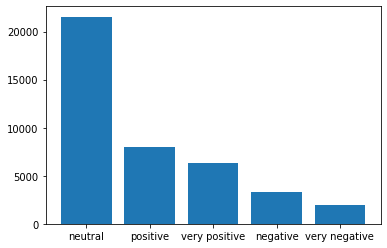

In [0]:
# plotting sentiment category as per count
senti_count = tweet_df["senti_cat"].value_counts().reset_index()
plt.bar(senti_count["index"], senti_count["senti_cat"])
plt.show()

In [0]:
# removing tweets with neutral sentiment
tweet_df = tweet_df[(tweet_df['senti_cat']!='neutral')].reset_index()

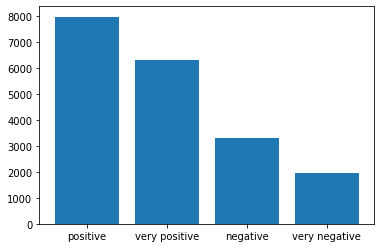

In [0]:
# plotting sentiment category as per count
senti_count = tweet_df["senti_cat"].value_counts().reset_index()
plt.bar(senti_count["index"], senti_count["senti_cat"])
plt.show()

In [0]:
tweet_df.head()

,index,created_at,hashtags,tweetid,lang,tweet,userid,senti_score,senti_cat
0,1,Thu Aug 01 15:00:00 +0000 2019,"Joke,Humour,Elf,ElfJokes",1156942663792451586,en,call santa sing elf wrapper joke humour elf e...,977120954802475008,0.6486,very positive
1,2,Thu Aug 01 15:00:00 +0000 2019,CarFromJapan,1156942663809032194,en,5 engin vibrat caus car axl guess number carfr...,2744724846,0.0772,positive
2,3,Thu Aug 01 15:00:00 +0000 2019,"Children,earlylanguage",1156942663788032005,en,know child good earlylanguag highest achiev pr...,1131185733899882496,0.4404,positive
3,6,Thu Aug 01 15:00:01 +0000 2019,BONADrinks,1156942667982487552,en,enjoy easi make infus gin tonic bonadrink,297363238,0.4939,positive
4,8,Thu Aug 01 15:00:01 +0000 2019,Climatechange,1156942667999170561,en,climatechang take first victim polar bear,1017827828602232832,-0.2732,negative


In [0]:
# removing unwanted columns from dataframe
tweet_df = tweet_df.drop(columns=['index', 'created_at','hashtags','lang','senti_score','userid'])

In [0]:
tweet_df.head()

,tweetid,tweet,senti_cat
0,1156942663792451586,call santa sing elf wrapper joke humour elf e...,very positive
1,1156942663809032194,5 engin vibrat caus car axl guess number carfr...,positive
2,1156942663788032005,know child good earlylanguag highest achiev pr...,positive
3,1156942667982487552,enjoy easi make infus gin tonic bonadrink,positive
4,1156942667999170561,climatechang take first victim polar bear,negative


In [0]:
# function to get median number of words per tweet
def get_num_words_per_sample(sample_texts):
    num_words = [len(s.split()) for s in sample_texts]
    return np.median(num_words)

In [0]:
#Getting the S/W ratio for the data
num_words = get_num_words_per_sample(tweet_df['tweet'])
sw_ratio = int(len(tweet_df['tweetid'])/num_words)
print("The S/W ratio is ", sw_ratio)

The S/W ratio is  2174


In [0]:
tweet_df.to_csv(r'/content/drive/My Drive/x18183239_August01_Tweets_Final.csv', index=False, header=True)

In [0]:
tweet_df = pd.read_csv(r'/content/drive/My Drive/x18183239_August01_Tweets_Final.csv')
tweet_df

,tweetid,tweet,senti_cat
0,1156942663792451586,call santa sing elf wrapper joke humour elf e...,very positive
1,1156942663809032194,5 engin vibrat caus car axl guess number carfr...,positive
2,1156942663788032005,know child good earlylanguag highest achiev pr...,positive
3,1156942667982487552,enjoy easi make infus gin tonic bonadrink,positive
4,1156942667999170561,climatechang take first victim polar bear,negative
...,...,...,...
19563,1156836413704482817,write great vers singer songwrit singersongwrit,very positive
19564,1156836413700300800,agust 2 suga drop new mixtap augustwish mean d...,negative
19565,1156836417865052160,glad didnt faint one rankx splatzon splatoon2 ...,positive
19566,1156836434642386944,shreemiverma may pray harder p justsay,positive


In [0]:
# getting max words in the processed tweet for padding
num_words = [len(s.split()) for s in tweet_df["tweet"]]
max(num_words)

22

In [0]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each tweet.
MAX_SEQUENCE_LENGTH = max(num_words)
# This is fixed.
EMBEDDING_DIM = 100

In [0]:
# converting to array for analysis
tweet_df = tweet_df.reset_index(drop=True)
tweet = tweet_df["tweet"].to_numpy()
sentiment = tweet_df["senti_cat"].to_numpy()

In [0]:
# vectorizing the tweets and creating encoders for the sentiment classes
tokenizer = text.Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(tweet)
x = tokenizer.texts_to_sequences(tweet)
x = sequence.pad_sequences(x, maxlen=MAX_SEQUENCE_LENGTH)
mlb.fit(sentiment)
y = mlb.transform(sentiment)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
print('Shape of text tensor:', x.shape)
print('Shape of label tensor:', y.shape)

Found 37864 unique tokens.
Shape of text tensor: (19568, 22)
Shape of label tensor: (19568,)


In [0]:
# splitting into train and test data for applying model
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2)

In [0]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(15654, 22) (15654,)
(3914, 22) (3914,)


In [0]:
word_index = tokenizer.word_index
print(word_index)

{'love': 1, 'like': 2, 'thank': 3, 'good': 4, 'get': 5, 'amp': 6, 'want': 7, 'one': 8, 'best': 9, 'u': 10, 'go': 11, 'win': 12, 'new': 13, 'day': 14, 'great': 15, 'time': 16, 'play': 17, 'im': 18, 'look': 19, 'see': 20, 'help': 21, 'make': 22, 'today': 23, 'join': 24, 'free': 25, 'pbb8kiligloudr': 26, 'happi': 27, 'come': 28, 'dont': 29, 'well': 30, 'know': 31, 'work': 32, 'check': 33, 'latest': 34, 'support': 35, 'need': 36, 'pleas': 37, 'share': 38, 'live': 39, 'peopl': 40, 'life': 41, 'say': 42, 'let': 43, 'first': 44, 'think': 45, 'miss': 46, 'watch': 47, 'back': 48, 'via': 49, 'hope': 50, 'pbb8kiligkiano': 51, 'would': 52, 'friend': 53, 'take': 54, 'realli': 55, 'year': 56, 'much': 57, 'way': 58, 'nowplay': 59, 'job': 60, '1': 61, 'bbnaija': 62, 'thing': 63, '2': 64, 'stop': 65, 'use': 66, 'follow': 67, 'better': 68, 'god': 69, 'show': 70, 'top': 71, 'game': 72, 'fuck': 73, '2019': 74, 'never': 75, 'care': 76, 'start': 77, 'news': 78, 'got': 79, 'call': 80, 'still': 81, 'btstwt': 

In [0]:
#creating an embedding matrix using Glove for twitter
import os
embeddings_index = {}
f = open(os.path.join(r'/content/drive/My Drive/Glove/glove.twitter.27B.200d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

embedding_matrix = np.zeros((len(word_index) + 1, 200))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

Found 1193514 word vectors.


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Reshape, Flatten, concatenate, Input, Conv1D, GlobalMaxPooling1D, Embedding,SpatialDropout1D, MaxPooling1D
from keras.layers.recurrent import LSTM
from keras.layers.convolutional import Conv1D
from keras.callbacks import ModelCheckpoint, EarlyStopping
model = Sequential()
model.add(Embedding(37865, 200, input_length=x.shape[1], trainable=False, weights=[embedding_matrix]))
model.add(Conv1D(filters=30, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling1D(pool_size=5))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.1, recurrent_dropout=0.2))
model.add(Dense(4, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

epochs = 10
batch_size = 100

history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss', patience=6, min_delta=0.0002)])

Using TensorFlow backend.


Train on 12523 samples, validate on 3131 samples
Epoch 1/10
12523/12523 [==============================] - 3s 224us/step - loss: 1.1331 - sparse_categorical_accuracy: 0.4953 - val_loss: 0.9273 - val_sparse_categorical_accuracy: 0.5976
Epoch 2/10
12523/12523 [==============================] - 2s 160us/step - loss: 0.8794 - sparse_categorical_accuracy: 0.6308 - val_loss: 0.8115 - val_sparse_categorical_accuracy: 0.6599
Epoch 3/10
12523/12523 [==============================] - 2s 158us/step - loss: 0.7799 - sparse_categorical_accuracy: 0.6813 - val_loss: 0.7605 - val_sparse_categorical_accuracy: 0.6899
Epoch 4/10
12523/12523 [==============================] - 2s 158us/step - loss: 0.7286 - sparse_categorical_accuracy: 0.7048 - val_loss: 0.7364 - val_sparse_categorical_accuracy: 0.7001
Epoch 5/10
12523/12523 [==============================] - 2s 162us/step - loss: 0.6681 - sparse_categorical_accuracy: 0.7292 - val_loss: 0.7183 - val_sparse_categorical_accuracy: 0.7087
Epoch 6/10
12523/1252

In [0]:
accr = model.evaluate(x_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

3914/3914 [==============================] - 0s 82us/step
Test set
  Loss: 0.697
  Accuracy: 0.736


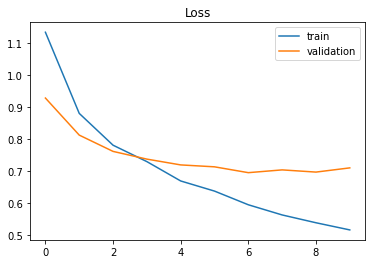

In [0]:
# loss plot for training and validation
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show();

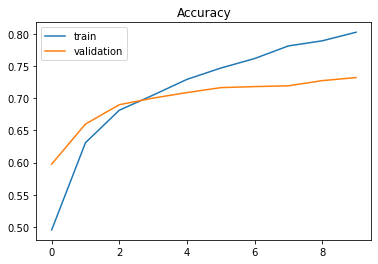

In [0]:
# accuracy plot for training and validation
plt.title('Accuracy')
plt.plot(history.history['sparse_categorical_accuracy'], label='train')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='validation')
plt.legend()
plt.show();

In [0]:
# predictions for test data
predictions = model.predict_classes(x_test, 
                            batch_size=100, 
                            verbose=1)

3914/3914 [==============================] - 0s 69us/step


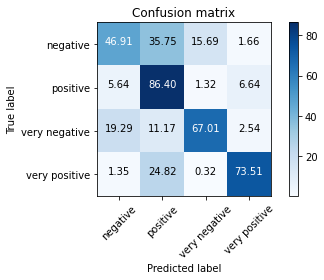

In [0]:
#confusion matrix for the test data
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = (cm.astype('float') / cm.sum(axis=1)[:, np.newaxis])*100

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# confusion matrix creation
from sklearn.metrics import confusion_matrix
y_true = mlb.inverse_transform(y_test)
y_pred = mlb.inverse_transform(predictions)
labels = mlb.classes_
cnf_matrix = confusion_matrix(y_true, y_pred,labels=labels)
#np.set_printoptions(precision=2)

# Plot confusion matrix
#plt.figure()
plot_confusion_matrix(cnf_matrix, classes=labels,
                      title='Confusion matrix')
